In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
pd.pandas.set_option("display.max_columns",None)

In [3]:
train=pd.read_csv("Hamid.csv")
train.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Mental Health,Real Life Performance
0,R1,Delhi-NCR,21.0,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4.0,Increased,NO,Cooking,YES,YES,School/college,Bad,Bad
1,R2,Delhi-NCR,21.0,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3.0,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely,Bad,Bad
2,R3,Delhi-NCR,20.0,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3.0,Remain Constant,NO,Listening to music,NO,YES,Travelling,Bad,Bad
3,R4,Delhi-NCR,20.0,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3.0,Decreased,NO,Watching web series,NO,NO,"Friends , relatives",Bad,Bad
4,R5,Delhi-NCR,21.0,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4.0,Remain Constant,NO,Social Media,NO,NO,Travelling,Bad,Bad


In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from collections import Counter

In [5]:
from imblearn.over_sampling import SMOTE

In [50]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=3, n_informative=3, n_redundant=0, n_classes=3, weights=[0.2, 0.8], class_sep=0.95, random_state=0)

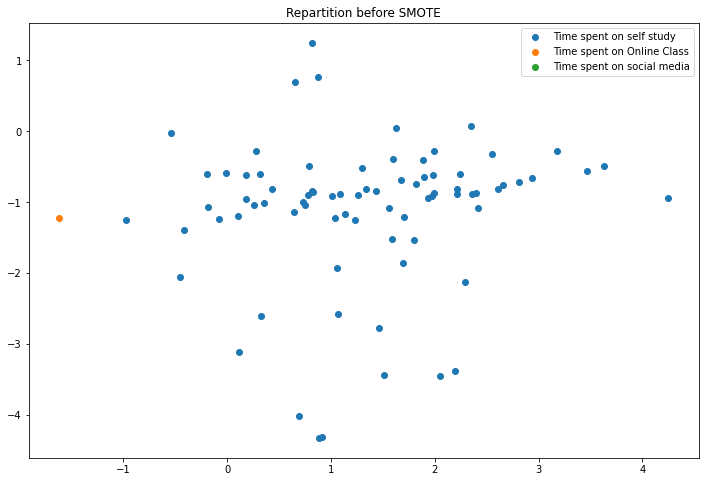

In [57]:
plt.figure(figsize=(12, 8))
plt.title('Repartition before SMOTE')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Time spent on self study')
plt.scatter(X[y==2][:, 0], X[y==2][:, 1], label='Time spent on Online Class')
plt.scatter(X[y==3][:, 0], X[y==3][:, 1], label='Time spent on social media')
plt.legend()
plt.grid(False)
plt.show()

In [8]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)

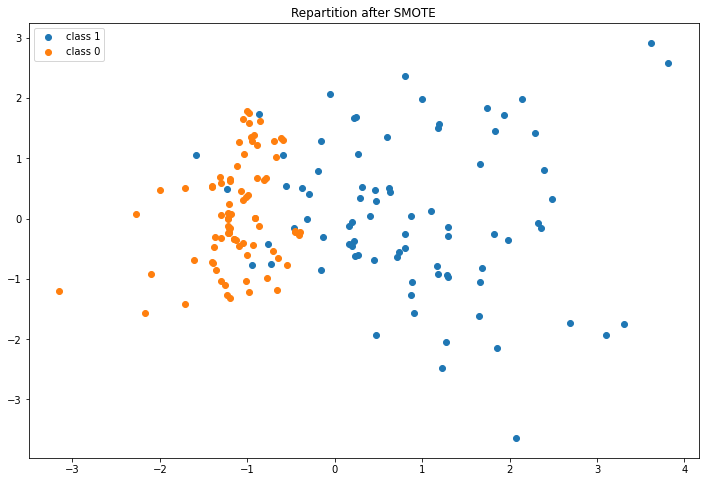

In [9]:
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')
plt.scatter(X_smote[y_smote==1][:, 0], X_smote[y_smote==1][:, 1], label='class 1')
plt.scatter(X_smote[y_smote==0][:, 0], X_smote[y_smote==0][:, 1], label='class 0')
plt.legend()
plt.grid(False)
plt.show()

In [33]:
df = pd.read_csv("Hamid.csv")
print("Number of Data: ", df.shape[0])

Number of Data:  1183


In [34]:
df = df.sample(1150)

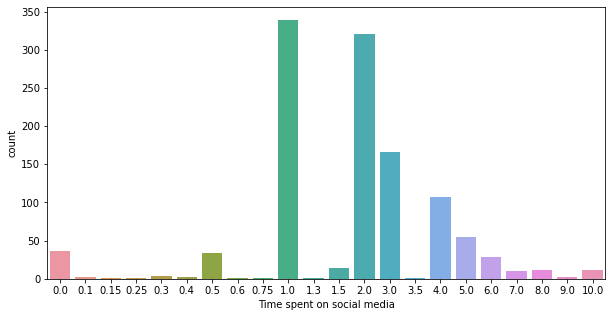

In [35]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Time spent on social media'])
plt.show()


In [38]:
print((df['Time spent on social media']))

441     5.0
781     2.0
314     6.0
1175    2.0
422     6.0
       ... 
50      2.0
294     1.0
392     4.0
31      2.0
1136    2.0
Name: Time spent on social media, Length: 1150, dtype: float64


In [36]:
df['Time spent on social media'] = df['Time spent on social media'].astype(float)

In [40]:
df.head(50)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Mental Health,Real Life Performance
441,R448,Outside Delhi-NCR,20.0,0.00,Very poor,Laptop/Desktop,2.0,0.0,7.0,5.0,Instagram,0,2.0,Decreased,YES,Listening to music,NO,YES,"Friends , relatives",Bad,Bad
781,R790,Outside Delhi-NCR,18.0,4.00,Very poor,Smartphone,1.0,2.0,9.0,2.0,Whatsapp,0.5,2.0,Decreased,NO,Listening to music,NO,YES,Roaming around freely,Bad,Bad
314,R321,Outside Delhi-NCR,26.0,1.00,Good,Laptop/Desktop,4.0,0.0,6.0,6.0,Facebook,4,3.0,Remain Constant,NO,Talking,NO,YES,Travelling,Bad,Bad
1175,R1189,Delhi-NCR,15.0,5.00,Good,Tablet,4.0,1.0,7.0,2.0,Whatsapp,0,4.0,Increased,NO,Social Media,NO,YES,Travelling,Bad,Bad
422,R429,Outside Delhi-NCR,21.0,0.00,Very poor,Laptop/Desktop,1.0,0.0,6.0,6.0,Instagram,1,3.0,Remain Constant,YES,Scrolling through social media,NO,NO,School/college,Bad,Bad
400,R407,Delhi-NCR,17.0,7.00,Excellent,Smartphone,1.0,1.0,4.0,1.0,Youtube,0,1.0,Decreased,NO,Cooking,YES,YES,School/college,Bad,Bad
829,R838,Outside Delhi-NCR,40.0,6.00,Excellent,Laptop/Desktop,2.0,1.0,6.0,2.0,Whatsapp,2,3.0,Decreased,NO,Listening to music,YES,NO,School/college,Bad,Bad
667,R675,Delhi-NCR,20.0,6.00,Average,Laptop/Desktop,2.0,1.0,8.0,4.0,Instagram,0,2.0,Remain Constant,NO,Online gaming,NO,NO,Roaming around freely,Bad,Bad
819,R828,Outside Delhi-NCR,21.0,2.00,Good,Laptop/Desktop,2.0,2.0,7.0,0.5,Whatsapp,0,4.0,Remain Constant,NO,Reading,YES,YES,Colleagues,Good,Bad
226,R228,Delhi-NCR,19.0,2.00,Very poor,Smartphone,5.0,1.0,9.0,2.0,Twitter,0,4.0,Remain Constant,NO,Listening to music,YES,NO,School/college,Bad,Bad
